### Задание, оцениваемое сокурсниками: Центральная предельная теорема своими руками

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Распределе́ние Паре́то в теории вероятностей — двухпараметрическое семейство абсолютно непрерывных распределений, являющихся степенными. Называется по имени Вилфредо Парето. Встречается при исследовании различных явлений, в частности, социальных, экономических, физических и других[1]. Вне области экономики иногда называется также распределением Брэдфорда. https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9F%D0%B0%D1%80%D0%B5%D1%82%D0%BE

Пусть случайная величина $ {\displaystyle X}￼ $ такова, что её распределение задаётся равенством:

$$ {\displaystyle F_{X}(x)=P(X<x)=1-\left({\frac {x_{m}}{x}}\right)^{k},\;\forall x\geq x_{m}},  
где  : {\displaystyle x_{m},k>0}￼. $$ Тогда говорят, что $ {\displaystyle X}￼ $ имеет распределение Парето с параметрами $ {\displaystyle x_{m}}￼ $ и $ {\displaystyle k}￼ $. Плотность распределения Парето имеет вид:

$$ {\displaystyle f_{X}(x)=\left\{{\begin{matrix}{\frac {kx_{m}^{k}}{x^{k+1}}},&x\geq x_{m}\\0,&x<x_{m}\end{matrix}}\right..}￼ $$

In [26]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import math

fig, ax = plt.subplots(1, 1)

Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки 

In [27]:
b = 5.0
rv = sts.pareto(b)  
r = sts.pareto.rvs(b, size=1000) # Generate random numbers
x = np.linspace(sts.pareto.ppf(0.01, b), sts.pareto.ppf(.999, b), 1000)
ax.hist(r, normed=True)
ax.grid(True)

нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины

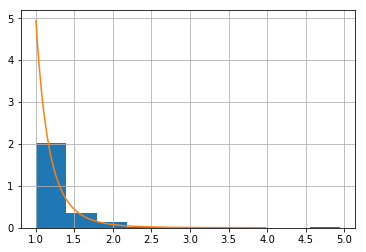

In [28]:
rpdf = rv.pdf(x)
ax.plot(x, rpdf)
plt.show()

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. 

In [29]:
# вспомогательная функция вычисления среднего в выборке из n объемом count 
def avgN(n=0, count=0, k=0):
    if n == 0 or count == 0: return None
    a = []
    i = 0
    while i < count:
        s = 0
        values = sts.pareto.rvs(k, size=n)
        for value in values:
            s = s + value
        a.append(s/n)
        i = i + 1
    return a

n5 = avgN(n=5, count=1000, k=b)
n10 = avgN(n=10, count=1000, k=b)
n25 = avgN(n=25, count=1000, k=b)
n100 = avgN(n=100, count=1000, k=b)

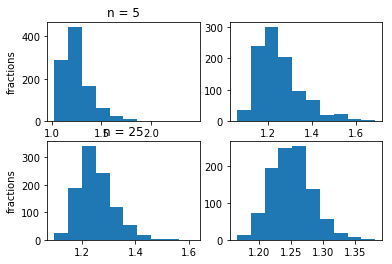

In [33]:
fig = plt.figure(1)
ax1 = fig.add_subplot(221)
ax1.set_title('n = 5')
ax1.set_ylabel('fractions')
ax1.hist(n5)
ax2 = fig.add_subplot(222)
ax2.hist(n10)
ax5 = fig.add_subplot(223)
ax5.set_title('n = 25')
ax5.set_ylabel('fractions')
ax5.hist(n25)
ax6 = fig.add_subplot(224)
ax6.hist(n100)
plt.show()

Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки.


Математическое ожидание	${\displaystyle {\frac {\,kx_{\mathrm {m} }}{k-1}}}￼, если: {\displaystyle k>1}￼$

In [34]:
x_m = 1
k = b
EX = (k * x_m)/(k - 1)
print "Теоретическое математическое ожидание EX =", EX

Теоретическое математическое ожидание EX = 1.25


Дисперсия ${\displaystyle \left({\frac {x_{\mathrm {m} }}{k-1}}\right)^{2}{\frac {k}{k-2}}} , при : {\displaystyle k>2}$

In [35]:
DX = (x_m/(k - 1))**2 * (k/(k - 2))
print "Теоретическая дисперсия DX =", DX

Теоретическая дисперсия DX = 0.104166666667


Среднеквадратическое отклонение $ DX = σ ^{2} $

In [36]:
sigma = math.sqrt(DX)
print "Теоретическое среднеквадратическое отклонение σ =", sigma

Теоретическое среднеквадратическое отклонение σ = 0.322748612184


Для каждой выборки размером n вычислить новое значение среднеквадратического отклонения DX/n и построить наложенный на гистограмму график нормального распределения.

In [37]:
sigma5 = math.sqrt(DX/5)
norm5 = sts.norm(loc=EX, scale=sigma5)

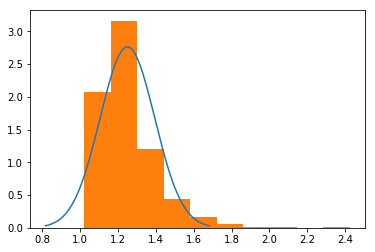

In [38]:
x = np.linspace(EX-(3*sigma5), EX+(3*sigma5), 1000)
pdf = norm5.pdf(x)
plt.plot(x, pdf)
plt.hist(n5, normed=True)
plt.show()

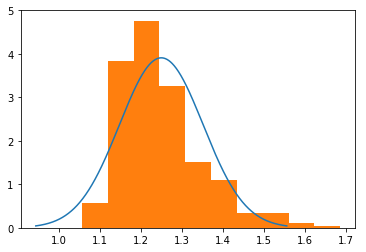

In [39]:
sigma10 = math.sqrt(DX/10)
norm10 = sts.norm(loc=EX, scale=sigma10)
x = np.linspace(EX-(3*sigma10), EX+(3*sigma10), 1000)
pdf = norm10.pdf(x)
plt.plot(x, pdf)
plt.hist(n10, normed=True)
plt.show()

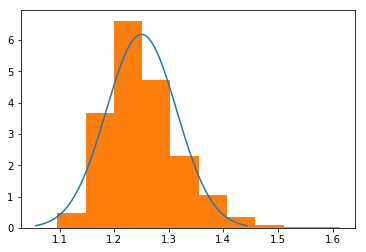

In [40]:
sigma25 = math.sqrt(DX/25)
norm25 = sts.norm(loc=EX, scale=sigma25)
x = np.linspace(EX-(3*sigma25), EX+(3*sigma25), 1000)
pdf = norm25.pdf(x)
plt.plot(x, pdf)
plt.hist(n25, normed=True)
plt.show()

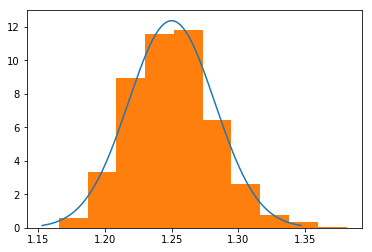

In [41]:
sigma100 = math.sqrt(DX/100)
norm100 = sts.norm(loc=EX, scale=sigma100)
x = np.linspace(EX-(3*sigma100), EX+(3*sigma100), 1000)
pdf = norm100.pdf(x)
plt.plot(x, pdf)
plt.hist(n100, normed=True)
plt.show()